In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

In [2]:
all_features = pd.read_csv("C:/Users/Allose/Notebook/all_features.csv", index_col=0)
transcriptome_df = pd.read_csv("C:/Users/Allose/Notebook/transcriptome_df.csv", index_col=0)
new_transcriptome_df = pd.read_csv('C:/Users/Allose/Notebook/sep_layer_transcriptome_df.csv', index_col=0)
cre_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/cre_parameter_df.csv", index_col=0)
new_label_df = pd.read_csv("C:/Users/Allose/Notebook/new_label_transcriptome_df.csv", index_col=0)
entrenz_symbol_s = pd.Series.from_csv("C:/Users/Allose/Notebook/entrenz_symbol_s.csv", index_col=0)
f = open("new_spearman_corr_ranks.json","r")
data = json.load(f)
spearman_corr_ranks = data
f.close()

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

parameters = ['gbar_Im', 'gbar_Ih', 'gbar_NaTs', 'gbar_Nap', 'gbar_K_P', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA', 'gamma_CaDynamics', 'decay_CaDynamics', 'soma_g_pas', 'axon_g_pas', 'dend_g_pas', 'apic_g_pas', 'gbar_NaV', 'gbar_Kd', 'gbar_Kv2like', 'gbar_Im_v2']

C:\Users\Allose\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [3]:
cre_parameter_df.head(10)

,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,gbar_Ca_LVA,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2
Chat-IRES-Cre-neo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chrna2-Cre_OE25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chrna2-Cre_OE25|Pvalb-T2A-Dre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ctgf-T2A-dgCre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Esr2-IRES2-Cre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gad2-IRES-Cre,NaN,0.000488,NaN,NaN,NaN,0.032012,0.000125,1.818406,0.000480,0.007290,0.008271,313.267829,0.000213,0.000074,0.000002,NaN,0.099432,1.958078e-08,0.234636,0.008393
Htr3a-Cre_NO152,0.002919,0.000565,0.492727,0.001076,0.040571,0.025572,0.039488,0.326395,0.000382,0.002596,0.012613,491.611269,0.000369,0.000445,0.000155,9.360292e-07,0.060871,3.099934e-05,0.020068,0.003688
Htr3a-Cre_NO152|Pvalb-T2A-Dre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ndnf-IRES2-dgCre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nkx2-1-CreERT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cre_parameter = pd.concat([all_features[['gbar_Kv3_1']], all_features[["cre_line"]]], axis=1)
#cre_parameter.drop(index=['Human'])
cre_conductance_filtered = cre_parameter[cre_parameter['gbar_Kv3_1'].notna()]
cre_conductance_filtered = cre_conductance_filtered[cre_conductance_filtered['cre_line'] != 'Human']
cre_conductance_filtered

,gbar_Kv3_1,cre_line
25,0.041603,Sst-IRES-Cre
64,0.145675,Scnn1a-Tg2-Cre
66,0.143225,Rbp4-Cre_KL100
74,0.195732,Rorb-IRES2-Cre
78,0.216270,Rorb-IRES2-Cre
117,0.224823,Rorb-IRES2-Cre
120,0.344977,Pvalb-IRES-Cre
136,0.123534,Scnn1a-Tg3-Cre
139,1.108132,Sst-IRES-Cre
147,0.168693,Rorb-IRES2-Cre


In [5]:
def graph_parameter_cre(parameter):
    plt.figure(figsize=(8, 8))
    plt.title('{} by Cre-Line'.format(parameter))
    plt.xticks(rotation=90)


    plt.title("Active conductance of g_Kv3.1 between Cre \n driver lines from available perisomatic models", fontsize=20)
    
    ax = sns.boxplot(x="cre_line", y=parameter, data=cre_conductance_filtered, palette="Set3")
    ax.set(xlabel='Cre driver line', ylabel='g_Kv3.1 Conductance')

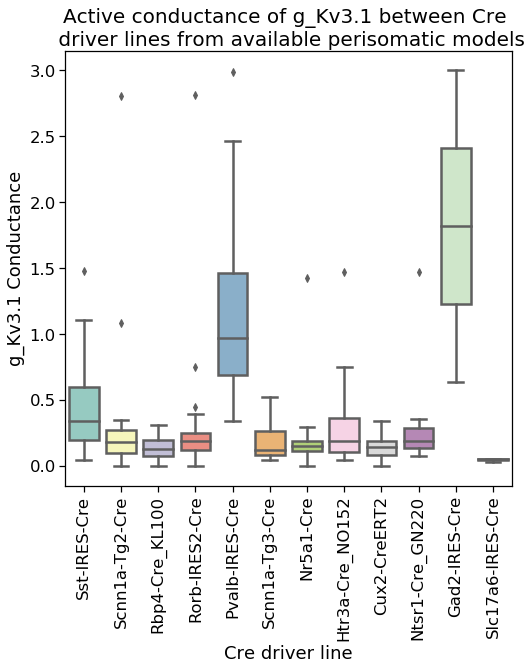

In [6]:
graph_parameter_cre('gbar_Kv3_1')

In [7]:
filtered = all_features[all_features['nm_id'] > 1]
parameters_only = filtered.filter(parameters)
parameters_only.isnull().sum()

gbar_Im             109
gbar_Ih               2
gbar_NaTs           109
gbar_Nap            109
gbar_K_P            109
gbar_K_T              2
gbar_SK               2
gbar_Kv3_1            2
gbar_Ca_HVA           2
gbar_Ca_LVA           2
gamma_CaDynamics      2
decay_CaDynamics      2
soma_g_pas            2
axon_g_pas            2
dend_g_pas            2
apic_g_pas           89
gbar_NaV            132
gbar_Kd             132
gbar_Kv2like        132
gbar_Im_v2          132
dtype: int64

In [8]:
for parameter in parameters:
    print("{}: {}".format(parameter, (parameters_only[parameter] == 0).sum()))

gbar_Im: 0
gbar_Ih: 0
gbar_NaTs: 0
gbar_Nap: 0
gbar_K_P: 0
gbar_K_T: 0
gbar_SK: 0
gbar_Kv3_1: 0
gbar_Ca_HVA: 0
gbar_Ca_LVA: 0
gamma_CaDynamics: 0
decay_CaDynamics: 0
soma_g_pas: 0
axon_g_pas: 0
dend_g_pas: 0
apic_g_pas: 0
gbar_NaV: 0
gbar_Kd: 0
gbar_Kv2like: 0
gbar_Im_v2: 0


In [9]:
parameter_type = 'gbar_Ih'
cre_parameter_df_spec = cre_parameter_df[[parameter_type]]
cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
filtered_cre = list(cre_conductance_filtered.index)
cre_conductance_filtered

,gbar_Ih
Gad2-IRES-Cre,0.000488
Htr3a-Cre_NO152,0.000565
Nr5a1-Cre,0.000286
Ntsr1-Cre_GN220,0.000113
Pvalb-IRES-Cre,0.000658
Rbp4-Cre_KL100,0.002129
Scnn1a-Tg2-Cre,0.000834
Scnn1a-Tg3-Cre,0.000603
Sst-IRES-Cre,0.000784


In [10]:
gene_symbol = 'Hcn1'
gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
gene_spec = new_label_df.loc[gene_id]
gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])

In [3]:
# Read the csv file from indicated path. Requires driver_line_anno.csv file
csv = pd.read_csv("driver_lines_anno.csv")

# Create cre_line color palette
cre_line_palette = {}
for index, row in csv.iterrows():
    cre_line_palette.update({row['driver_lines_label']:row['driver_lines_color']})

cre_line_palette.update({'Human':'#000000'})

# Extraneous cre_line outside of file.
cre_line_palette.update({'Rorb-IRES2-Cre':'#2B8C88'})
cre_line_palette.update({'Esr2-IRES2-Cre-neo':'#5100FF'})
cre_line_palette.update({'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre':'#DF2166'})
cre_line_palette.update({'Vipr2-IRES2-Cre-neo':'#76958C'})
cre_line_palette.update({'Esr2-IRES2-Cre|PhiC31-neo':'#5100FF'})
cre_line_palette.update({'Esr2-IRES2-Cre-neo|PhiC31-neo':'#5100FF'})
cre_line_palette.update({'Pvalb-T2A-FlpO|Vipr2-IRES2-Cre':'#FF197F'})
cre_line_palette.update({'Pvalb-T2A-CreERT2':'#FF197F'})

cre_color = ["Gad2-IRES-Cre", "Htr3a-Cre_NO152", "Nr5a1-Cre", "Ntsr1-Cre_GN220", "Pvalb-IRES-Cre", "Rbp4-Cre_KL100", "Scnn1a-Tg2-Cre", "Scnn1a-Tg3-Cre", "Sst-IRES-Cre"]

In [4]:
cre_line_palette

{'Calb1-IRES2-Cre': '#AA9C30',
 'Chat-IRES-Cre-neo': '#A90CC9',
 'Chrna2-Cre_OE25': '#E58A19',
 'Chrna2-Cre_OE25|Pvalb-T2A-Dre': '#F46640',
 'Chrnb3-Cre_SM93': '#3479A6',
 'Crh-IRES-Cre_ZJH|Sst-IRES-FlpO': '#A64213',
 'Ctgf-T2A-dgCre': '#47797E',
 'Cux2-CreERT2': '#2D9CAB',
 'Esr2-IRES2-Cre': '#5100FF',
 'Etv1-CreERT2|Pvalb-T2A-FlpO': '#D44155',
 'Gad2-IRES-Cre': '#D98463',
 'Glt25d2-Cre_NF107': '#74B3A0',
 'Gng7-Cre_KH71': '#808B61',
 'Htr3a-Cre_NO152': '#DF6BC6',
 'Htr3a-Cre_NO152|Pvalb-T2A-Dre': '#BC394B',
 'Htr3a-Cre_NO152|Sst-IRES-FlpO': '#CF790F',
 'Ndnf-IRES2-dgCre': '#C07B85',
 'Ndnf-IRES2-dgCre|Slc32a1-IRES2-FlpO': '#E36D83',
 'Nkx2-1-CreERT2': '#BD4656',
 'No Cre or Flp Driver': '#579172',
 'Nos1-CreERT2': '#D1993F',
 'Nos1-CreERT2|Sst-IRES-FlpO': '#BB760D',
 'Npy-IRES2-FlpO': '#D78473',
 'Nr5a1-Cre': '#43BCA9',
 'Ntsr1-Cre_GN220': '#70849A',
 'Oxtr-T2A-Cre': '#B8AE3E',
 'Oxtr-T2A-Cre|Pvalb-T2A-FlpO': '#CD3449',
 'Pdyn-T2A-CreERT2': '#BE8518',
 'Penk-IRES2-Cre-neo': '#9B6D97'

In [6]:
def graph_conductance_exp(parameter_type, gene_symbol):
    cre_parameter_df_spec = cre_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = new_label_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    plt.figure(figsize=(8, 8))
    plt.title('Correspondence of {} conductance \n and {} gene expression by Cre driver line'.format(parameter_type, gene_symbol))
    
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=cre_color, data=graph_spec, s = 100)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")

    ax.set(xlabel='Kcnc1 Transcriptomic Gene Expression', ylabel='g_Kv3.1 Conductance')

In [74]:
def create_matrix(parameter, spearman_dict):
    d = {"symbol": list(spearman_dict[parameter].keys()), "correlation": list(spearman_dict[parameter].values())}
    test = pd.DataFrame(d)
    return test.sort_values(by=['correlation'])


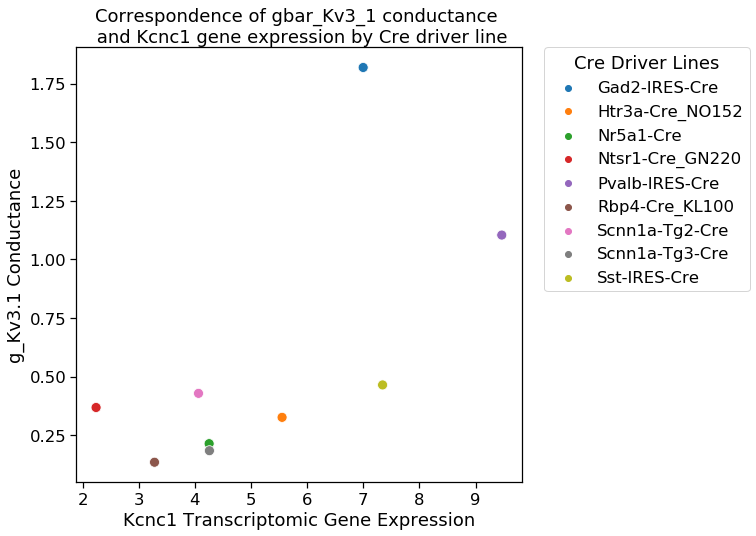

In [7]:
graph_conductance_exp('gbar_Kv3_1', 'Kcnc1')

In [24]:
df = create_matrix("gbar_Kv3_1", spearman_corr_ranks)
df

,symbol,correlation
1465,Bri3,-0.950000
5523,Jade3,-0.933333
5414,Inhba,-0.916667
4656,Gm7908,-0.916667
5928,LOC105244315,-0.916667
3075,Egr3,-0.900000
1495,Btbd9,-0.900000
6366,Map3k6,-0.883333
9629,Sirt7,-0.883333
4349,Gm32951,-0.883333


In [25]:
def get_rank_symbol(sym):
    rank = pd.Index(df['symbol']).get_loc(sym)
    print(df.loc[df['symbol'] == 'Kcnc1'])
    return (rank + 1)/12210

In [26]:
get_rank_symbol('Kcnc1')
    

     symbol  correlation
5593  Kcnc1     0.616667


0.814004914004914

In [111]:
missing_exp = ['Rorb-IRES2-Cre', 'Slc17a6-IRES-Cre', 'Cux2-CreERT2']

hue = ["Gad2-IRES-Cre", "Htr3a-Cre_NO152", "Nr5a1-Cre", "Ntsr1-Cre_GN220", "Pvalb-IRES-Cre", "Rbp4-Cre_KL100", "Scnn1a-Tg2-Cre", "Scnn1a-Tg3-Cre", "Sst-IRES-Cre"]

In [112]:
list(all_features)

['average_bifurcation_angle_remote',
 'average_contraction',
 'average_diameter',
 'average_fragmentation',
 'average_parent_daughter_ratio',
 'avg_isi',
 'electrode_0_pa',
 'f_i_curve_slope',
 'fast_trough_t_long_square',
 'fast_trough_t_ramp',
 'fast_trough_t_short_square',
 'fast_trough_v_long_square',
 'fast_trough_v_ramp',
 'fast_trough_v_short_square',
 'has_burst',
 'has_delay',
 'has_pause',
 'hausdorff_dimension',
 'id_x',
 'id_y',
 'input_resistance_mohm',
 'latency',
 'max_branch_order',
 'max_euclidean_distance',
 'max_path_distance',
 'neuron_reconstruction_type',
 'number_bifurcations',
 'number_branches',
 'number_nodes',
 'number_stems',
 'number_tips',
 'overall_depth',
 'overall_height',
 'overall_width',
 'peak_t_long_square',
 'peak_t_ramp',
 'peak_t_short_square',
 'peak_v_long_square',
 'peak_v_ramp',
 'peak_v_short_square',
 'rheobase_sweep_id',
 'rheobase_sweep_number',
 'ri',
 'sag',
 'scale_factor_x',
 'scale_factor_y',
 'scale_factor_z',
 'seal_gohm',
 'slow_

In [11]:
cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]



In [12]:
cre_layer_dendrite = cre_layer_dendrite[cre_layer_dendrite.dendrite_type != 'sparsely spiny']
cre_layer_dendrite = cre_layer_dendrite[cre_layer_dendrite.cre_line != 'Human']
cre_layer_dendrite.sort_values(by=['structure_layer'])
cre_layer_dendrite.sort_values(by=['dendrite_type'])
cre_layer_dendrite.sort_values(by=['cre_line'])

,cre_line,structure_layer,dendrite_type,nm_id,reconstruction_type
447,Chat-IRES-Cre-neo,4,aspiny,NaN,full
602,Chat-IRES-Cre-neo,2/3,aspiny,NaN,full
2310,Chat-IRES-Cre-neo,5,aspiny,NaN,NaN
2309,Chat-IRES-Cre-neo,4,aspiny,NaN,NaN
1327,Chat-IRES-Cre-neo,2/3,aspiny,NaN,full
1620,Chat-IRES-Cre-neo,2/3,aspiny,NaN,NaN
310,Chat-IRES-Cre-neo,2/3,aspiny,NaN,NaN
151,Chat-IRES-Cre-neo,2/3,aspiny,NaN,NaN
1667,Chat-IRES-Cre-neo,5,aspiny,NaN,NaN
855,Chat-IRES-Cre-neo,4,aspiny,NaN,full


In [13]:
all_features['cell_type'] = 'False'

In [14]:
for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [15]:
new_list = ['cell_type']
new_list.extend(parameters)
cell_type_parameter = all_features[new_list]
cell_type_parameter

,cell_type,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,...,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2
0,False,0.001732,1.027617e-03,5.703488,1.977317e-04,0.095741,0.022960,1.075783e-03,0.481481,0.000315,...,0.002055,640.061789,9.312563e-04,0.000151,9.302760e-05,1.670824e-07,NaN,NaN,NaN,NaN
1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ndnf-IRES2-dgCre__L5__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Htr3a-Cre_NO152__L2/3__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Scnn1a-Tg3-Cre__L4__exc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nkx2-1-CreERT2__L2/3__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Htr3a-Cre_NO152__L2/3__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre__L4__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Scnn1a-Tg3-Cre__L4__exc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Vip-IRES-Cre__L6__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cell_types_label = []

for item in list(cell_type_parameter['cell_type']):
    if item not in cell_types_label:
        cell_types_label.append(item)

In [18]:
cell_type_parameter_count = pd.DataFrame()

cut = pd.concat([all_features[['cell_type']], all_features[['specimen_id']]], axis = 1)

for parameter in parameters:
    new_cut = pd.concat([cut, all_features[[parameter]]], axis = 1)
    count = new_cut.set_index(["cell_type", "specimen_id"]).count(level="cell_type")
    cell_type_parameter_count = pd.concat([cell_type_parameter_count, count[[parameter]]], axis = 1)

cell_type_parameter_count

,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,gbar_Ca_LVA,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2
cell_type,,,,,,,,,,,,,,,,,,,,
Chat-IRES-Cre-neo__L2/3__inh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chat-IRES-Cre-neo__L4__inh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chat-IRES-Cre-neo__L5__inh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chat-IRES-Cre-neo__L6__inh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chrna2-Cre_OE25__L1__inh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chrna2-Cre_OE25__L2/3__inh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chrna2-Cre_OE25__L4__exc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chrna2-Cre_OE25__L5__exc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chrna2-Cre_OE25__L5__inh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
cell_type_parameter_count = cell_type_parameter_count[(cell_type_parameter_count.T != 0).any()]

cell_type_parameter_count.to_csv('all_models_count.csv')

In [1]:
cell_type_parameter_count['gbar_Im']

NameError: name 'cell_type_parameter_count' is not defined

In [11]:
cell_type_parameter_df = pd.DataFrame()
for parameter in parameters:
    for cre in cell_types_label:
        num = cell_type_parameter_count.loc[cre, parameter]
        cell_type_parameter_df.set_value(cre, parameter, (all_features.loc[all_features['cell_type'] == cre, parameter].sum())/num)
cell_type_parameter_df

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,gbar_Ca_LVA,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2
False,0.001150,1.131504e-03,1.771821,0.000803,0.025880,6.124697e-03,0.053935,0.293400,0.000465,5.833997e-03,0.006807,580.391887,3.846876e-04,0.000406,4.178752e-05,3.460246e-05,0.154139,2.638067e-03,0.046258,1.073016e-03
Ndnf-IRES2-dgCre__L5__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Htr3a-Cre_NO152__L2/3__inh,0.001080,7.628850e-04,0.452069,0.001564,0.060174,2.788123e-02,0.067356,0.235402,0.000362,2.058590e-03,0.013284,327.152609,3.273452e-04,0.000578,1.658285e-04,NaN,0.052717,2.179481e-05,0.030079,2.566034e-03
Scnn1a-Tg3-Cre__L4__exc,0.000741,8.317589e-04,1.289620,0.000404,0.042359,1.590624e-02,0.009373,0.182939,0.000592,4.794315e-03,0.003969,623.604166,3.424224e-04,0.000454,5.495231e-05,1.631388e-04,0.386163,1.786302e-03,0.000014,1.594630e-02
Nkx2-1-CreERT2__L2/3__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre__L4__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vip-IRES-Cre__L6__inh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rorb-IRES2-Cre__L2/3__exc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pvalb-IRES-Cre__L2/3__inh,NaN,3.826631e-04,NaN,NaN,NaN,8.797052e-02,0.014408,0.693312,0.000364,7.190846e-03,0.016836,210.822267,3.748711e-04,0.000610,1.610261e-05,NaN,0.054622,1.066682e-06,0.076866,2.877101e-03
Pvalb-IRES-Cre__L5__inh,NaN,4.812232e-04,NaN,NaN,NaN,3.125011e-02,0.024287,1.266772,0.000575,4.233758e-03,0.014760,394.600137,2.032201e-04,0.000456,6.273016e-05,NaN,0.054170,7.419430e-05,0.098076,2.606448e-03


In [12]:
parameter_type = 'gbar_Kv3_1'
cell_type_parameter_df_spec = cell_type_parameter_df[[parameter_type]]
cell_type_conductance_filtered = cell_type_parameter_df_spec[cell_type_parameter_df_spec[parameter_type].notna()]
filtered_cre = list(cell_type_conductance_filtered.index)
cell_type_conductance_filtered

,gbar_Kv3_1
False,0.293400
Htr3a-Cre_NO152__L2/3__inh,0.235402
Scnn1a-Tg3-Cre__L4__exc,0.182939
Pvalb-IRES-Cre__L2/3__inh,0.693312
Pvalb-IRES-Cre__L5__inh,1.266772
Ntsr1-Cre_GN220__L6__exc,0.149601
Nr5a1-Cre__L4__exc,0.126182
Gad2-IRES-Cre__L5__inh,1.818406
Sst-IRES-Cre__L5__inh,0.515266
Nr5a1-Cre__L2/3__exc,0.175849


In [ ]:
gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
gene_spec = new_label_df.loc[gene_id]
gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])

In [167]:
transcriptome_df.T.loc['Gad2-IRES-Cre__L5__inh']

71661        0.067034
76253        0.007101
58520        6.723908
66050        6.728734
100125929    0.194911
66838        1.812778
66839        2.204346
100039060    0.000000
71675        6.260648
104457       6.030289
68347        5.735279
106264       7.758268
78687        0.000000
68364        2.957245
68369        0.000000
74098        6.396180
70345        0.010963
68397        0.217858
68386        0.153355
67672        0.777344
75394        0.226517
76261        0.048039
68400        0.158628
68434        0.030581
75405        0.000000
66117        7.132825
68488        0.086492
100043040    2.078510
68483        0.240267
68001        5.634030
               ...   
22793        4.520301
195018       3.760387
108946       3.425282
50518        0.003058
67669        7.279896
100861471    0.000000
100861472    0.000000
100861473    0.000000
100861474    0.000000
100861475    0.000000
100861477    0.000000
100861478    0.000000
100861479    0.000000
100861481    0.000000
100861482 

In [ ]:
new_label_df = pd.DataFrame()

for new_label in cell_types_label:
    sums = []
    for label in sorted_old_labels:
        if label.split('__')[0] == new_label:
            sums.append(transcriptome_df[label])
    length = len(sums)
    if length == 1:
        new_label_df[new_label] = sums[0]
    if length == 2:
        new_label_df[new_label] = (sums[0] + sums[1]) / length
    if length == 3:
        new_label_df[new_label] = (sums[0] + sums[1] + sums[2]) / length
    if length == 4:
        new_label_df[new_label] = (sums[0] + sums[1] + sums[2] + sums[3]) / length
    if length == 5:
        new_label_df[new_label] = (sums[0] + sums[1] + sums[2] + sums[3] + sums[4]) / length
    if length == 6:
        new_label_df[new_label] = (sums[0] + sums[1] + sums[2] + sums[3] + sums[4] + sums[5]) / length
        
# new_label_df.loc[15165]

In [159]:
Kcnc1

,16502
Gad2-IRES-Cre__L5__inh,7.449158
Sst-IRES-Cre__L6__inh,7.005162
Nos1-CreERT2|Sst-IRES-FlpO__L5-L6__inh,5.904470
Oxtr-T2A-Cre__L5-L6__inh,6.045112
Rbp4-Cre_KL100__L4__exc,4.345955
Sim1-Cre_KJ18__L4-L6__exc,3.221641
Chrna2-Cre_OE25__L5__inh,7.355529
Tlx3-Cre_PL56__L4-L6__exc,3.203218
Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5-L6__inh,8.748922
Chat-IRES-Cre-neo__L2/3__inh,6.583931


In [149]:
sorted_old_labels = list(transcriptome_df)
sorted_old_labels.sort()
sorted_old_labels

['Chat-IRES-Cre-neo__L2/3__inh',
 'Chat-IRES-Cre-neo__L4__inh',
 'Chrna2-Cre_OE25__L5__inh',
 'Chrna2-Cre_OE25__L6__inh',
 'Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5-L6__inh',
 'Ctgf-T2A-dgCre__L6__exc',
 'Esr2-IRES2-Cre__L5-L6__exc',
 'Gad2-IRES-Cre__L1__inh',
 'Gad2-IRES-Cre__L5__inh',
 'Htr3a-Cre_NO152__L2/3__inh',
 'Htr3a-Cre_NO152__L4__inh',
 'Htr3a-Cre_NO152__L5-L6__exc',
 'Htr3a-Cre_NO152__L5__inh',
 'Htr3a-Cre_NO152__L6__inh',
 'Htr3a-Cre_NO152|Pvalb-T2A-Dre__L5-L6__inh',
 'Ndnf-IRES2-dgCre__L1__inh',
 'Nkx2-1-CreERT2__L1-L4__inh',
 'Nkx2-1-CreERT2__L5-L6__inh',
 'Nos1-CreERT2__L1-L4__inh',
 'Nos1-CreERT2__L5-L6__inh',
 'Nos1-CreERT2|Sst-IRES-FlpO__L5-L6__inh',
 'Nr5a1-Cre__L4__exc',
 'Ntsr1-Cre_GN220__L6__exc',
 'Oxtr-T2A-Cre__L1-L4__inh',
 'Oxtr-T2A-Cre__L5-L6__exc',
 'Oxtr-T2A-Cre__L5-L6__inh',
 'Penk-IRES2-Cre-neo__L5-L6__exc',
 'Pvalb-IRES-Cre__L2/3__inh',
 'Pvalb-IRES-Cre__L4__inh',
 'Pvalb-IRES-Cre__L5__inh',
 'Pvalb-IRES-Cre__L6__inh',
 'Rbp4-Cre_KL100__L4__exc',
 'Rbp4-Cre_KL1

In [161]:
cell_types_label_df = pd.DataFrame()

for label in sorted_old_labels.head(2):
    cre_layer_excite = label.split('__')
    cre_label = cre_layer_excite[0]
    layer_label = cre_layer_excite[1]
    excite_label = cre_layer_excite[2]
    if excite_label == 'inh':
        excite_label = 'aspiny'
    else:
        excite_label = 'spiny'
        
    if '-' in layer_label:
        sep_layer = layer_label.split('-')
        first_num = sep_layer[0][1:]
        second_num = sep_layer[1][1:]
        num_layers = second_num[0] - first_num[0] + 1
        for i in range(num_layers):
            cell_types_label_df.append(transcriptome_df.T.loc[label])
        

SyntaxError: invalid syntax (<ipython-input-161-69c920f93130>, line 1)

In [124]:
cre_layer_dendrite = cre_layer_dendrite[['cell_type', 'nm_id', 'dendrite_type', 'reconstruction_type']]

In [131]:
parameters

['gbar_Im',
 'gbar_Ih',
 'gbar_NaTs',
 'gbar_Nap',
 'gbar_K_P',
 'gbar_K_T',
 'gbar_SK',
 'gbar_Kv3_1',
 'gbar_Ca_HVA',
 'gbar_Ca_LVA',
 'gamma_CaDynamics',
 'decay_CaDynamics',
 'soma_g_pas',
 'axon_g_pas',
 'dend_g_pas',
 'apic_g_pas',
 'gbar_NaV',
 'gbar_Kd',
 'gbar_Kv2like',
 'gbar_Im_v2']

In [125]:
cre_layer_dendrite.sort_values(by=['cell_type'])
cre_layer_dendrite.groupby('cell_type').count()


,nm_id,dendrite_type,reconstruction_type
cell_type,,,
Chat-IRES-Cre-neo__2/3__aspiny,0,34,9
Chat-IRES-Cre-neo__2/3__sparsely spiny,0,11,6
Chat-IRES-Cre-neo__4__aspiny,0,18,6
Chat-IRES-Cre-neo__5__aspiny,0,3,0
Chat-IRES-Cre-neo__6a__aspiny,0,1,0
Chrna2-Cre_OE25__1__aspiny,0,2,0
Chrna2-Cre_OE25__2/3__aspiny,0,3,1
Chrna2-Cre_OE25__4__spiny,0,2,1
Chrna2-Cre_OE25__5__aspiny,0,11,2


In [128]:
cre_layer_dendrite_nm = cre_layer_dendrite[cre_layer_dendrite['nm_id']>0]
cre_layer_dendrite_morph = cre_layer_dendrite[cre_layer_dendrite['reconstruction_type'].notna()]

In [169]:
cre_layer_dendrite_nm.groupby('cell_type').count()

,nm_id,dendrite_type,reconstruction_type
cell_type,,,
Cux2-CreERT2__2/3__spiny,1,1,1
Cux2-CreERT2__4__spiny,8,8,7
Cux2-CreERT2__5__spiny,1,1,1
Gad2-IRES-Cre__5__aspiny,2,2,2
Htr3a-Cre_NO152__1__aspiny,1,1,1
Htr3a-Cre_NO152__2/3__aspiny,9,9,9
Htr3a-Cre_NO152__4__aspiny,1,1,1
Htr3a-Cre_NO152__5__aspiny,4,4,4
Htr3a-Cre_NO152__6a__spiny,1,1,1


In [170]:
cre_layer_dendrite_morph.groupby('cell_type').count()

,nm_id,dendrite_type,reconstruction_type
cell_type,,,
Chat-IRES-Cre-neo__2/3__aspiny,0,9,9
Chat-IRES-Cre-neo__2/3__sparsely spiny,0,6,6
Chat-IRES-Cre-neo__4__aspiny,0,6,6
Chrna2-Cre_OE25__2/3__aspiny,0,1,1
Chrna2-Cre_OE25__4__spiny,0,1,1
Chrna2-Cre_OE25__5__aspiny,0,2,2
Chrna2-Cre_OE25__5__sparsely spiny,0,7,7
Chrna2-Cre_OE25__5__spiny,0,1,1
Chrna2-Cre_OE25__6a__aspiny,0,1,1


In [85]:
spearman_corr_ranks = {}
for parameter_ranks in parameters:
    spearman_corr_ranks[parameter_ranks] = {}
    cre_parameter_df_spec = cre_parameter_df[[parameter_ranks]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_ranks].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    for items in entrenz_symbol_s.iteritems():
        gene_symbol = items[1]
        gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
        gene_spec = new_label_df.loc[gene_id]
        gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])

        graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    
        spearman_val = graph_spec.corr(method="spearman").iloc[0, 1]
        spearman_corr_ranks[parameter_ranks][gene_symbol] = spearman_val
    
spearman_corr_ranks

{'gbar_Im': {'0610007P14Rik': 0.0,
  '0610009B22Rik': 0.16666666666666666,
  '0610009L18Rik': 0.5952380952380952,
  '0610009O20Rik': 0.42857142857142855,
  '0610010F05Rik': 0.07142857142857142,
  '0610010K14Rik': 0.23809523809523808,
  '0610011F06Rik': 0.47619047619047616,
  '0610012G03Rik': 0.11904761904761904,
  '0610030E20Rik': -0.2619047619047619,
  '0610037L13Rik': 0.2857142857142857,
  '0610040B10Rik': 0.5238095238095238,
  '1110001J03Rik': 0.14285714285714285,
  '1110002L01Rik': 0.7619047619047619,
  '1110004E09Rik': 0.2857142857142857,
  '1110004F10Rik': 0.16666666666666666,
  '1110007C09Rik': 0.8571428571428571,
  '1110008F13Rik': 0.38095238095238093,
  '1110008L16Rik': 0.3333333333333333,
  '1110008P14Rik': -0.40476190476190477,
  '1110012L19Rik': 0.3333333333333333,
  '1110018N20Rik': -0.21428571428571427,
  '1110019D14Rik': 0.16666666666666666,
  '1110032A03Rik': 0.5238095238095238,
  '1110032F04Rik': -0.023809523809523808,
  '1110034G24Rik': -0.09523809523809523,
  '111003

In [86]:
import json

json = json.dumps(spearman_corr_ranks)
f = open("new_spearman_corr_ranks.json","w")
f.write(json)
f.close()

In [90]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
import pandas as pd

# Initialize the cache and dget the metadata for cells, download if neccessary (to current directory)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
cells = ctc.get_cells()

def append_cell_feature(dataframe, feature_name):
    cell_index = {c['id']: c for c in cells}

    # Label species, human (Homo Sapiens) or mouse (Mus musculus)
    cell_types = [cell_index[cid][feature_name] for cid in dataframe['specimen_id']]

    dataframe[feature_name] = pd.Series(cell_types, index=dataframe.index)

In [91]:
append_cell_feature(all_features, 'reconstruction_type')

In [16]:
new_transcriptome_df.loc[15165].sort_index()

Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5__inh       8.237079
Chrna2-Cre_OE25|Pvalb-T2A-Dre__L6__inh       8.237079
Esr2-IRES2-Cre__L5__exc                      3.118030
Esr2-IRES2-Cre__L6__exc                      3.118030
Htr3a-Cre_NO152__L5__exc                     4.857644
Htr3a-Cre_NO152__L6__exc                     4.857644
Htr3a-Cre_NO152|Pvalb-T2A-Dre__L5__inh       7.823570
Htr3a-Cre_NO152|Pvalb-T2A-Dre__L6__inh       7.823570
Nkx2-1-CreERT2__L1__inh                      8.663799
Nkx2-1-CreERT2__L2__inh                      8.663799
Nkx2-1-CreERT2__L3__inh                      8.663799
Nkx2-1-CreERT2__L4__inh                      8.663799
Nkx2-1-CreERT2__L5__inh                      8.775508
Nkx2-1-CreERT2__L6__inh                      8.775508
Nos1-CreERT2__L1__inh                        6.456394
Nos1-CreERT2__L2__inh                        6.456394
Nos1-CreERT2__L3__inh                        6.456394
Nos1-CreERT2__L4__inh                        6.456394
Nos1-CreERT2__L5__inh       